In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

In [2]:
#Importing data in Jupyter Notebook
cafe = pd.read_csv('Cafes_in_Mumbai.csv')

#fetching top 5 rows from the data
cafe.head()

,Unnamed: 0,Cafe Name,Address,Rating,Cuisine,Average Cost for Two,Opening Hours,Contact Number
0,0,Gourmet Coffee 1,"606 Versova, Mumbai",3.2,Fusion,661,6 AM - 9 PM,8533110290
1,1,Brew & Bite 2,"707 Worli, Mumbai",3.3,Indian,1459,8 AM - 8 PM,8971344713
2,2,Cafe Moments 3,"808 Malabar Hill, Mumbai",3.3,Vietnamese,1153,9 AM - 12 PM,9565334772
3,3,Sip & Savor 4,"606 Versova, Mumbai",3.1,American,1448,9 AM - 12 PM,7911847718
4,4,Leisure Lounge 5,"404 Lower Parel, Mumbai",3.0,Italian,582,11 AM - 11 PM,9153355514


In [112]:
#overview of data
cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   Cafe Name             1000 non-null   object 
 2   Address               1000 non-null   object 
 3   Rating                1000 non-null   float64
 4   Cuisine               1000 non-null   object 
 5   Average Cost for Two  1000 non-null   int64  
 6   Opening Hours         1000 non-null   object 
 7   Contact Number        1000 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


### This data shows 1000 cafes in Mumbai and no values is null 

In [113]:
# Description of data
cafe.describe()

,Unnamed: 0,Rating,Average Cost for Two,Contact Number
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,499.500000,3.994600,924.966000,8.518446e+09
std,288.819436,0.585349,350.729323,8.624267e+08
min,0.000000,3.000000,301.000000,7.001449e+09
25%,249.750000,3.500000,617.000000,7.786531e+09
50%,499.500000,4.000000,932.000000,8.518369e+09
75%,749.250000,4.500000,1233.000000,9.274841e+09
max,999.000000,5.000000,1499.000000,9.987541e+09


### From this we can conclude that the minimum rating can a cafe get is 3 and the maximum rating is 5
### we can see that the average cost for 2 person is 924rs, the minimum cost is 350rs and the maximum cost is 1499rs

# Distribution of Ratings Among Cafes

Text(0, 0.5, 'Number of Cafes')

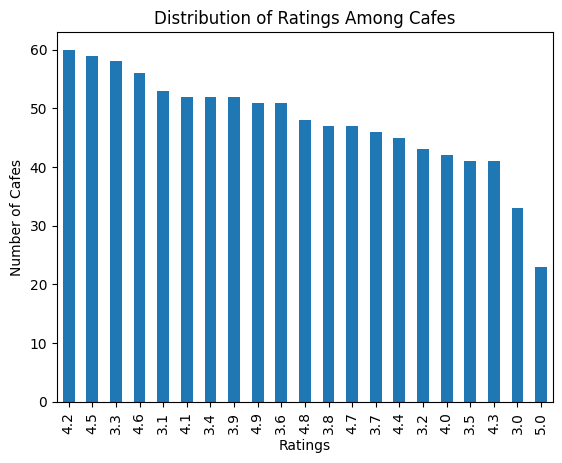

In [114]:
#importing matplotlib library for the visualization

import matplotlib.pyplot as plt
cafe['Rating'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Distribution of Ratings Among Cafes')
plt.xlabel('Ratings')
plt.ylabel('Number of Cafes')

### From this we can conclude that maximum number of cafes(nearly 60) are getting 4.2 ratings and Fewer cafes are rated in the lower and higher ends of the range.

# Areas Have the Highest Concentration of Cafes

In [115]:
cafe

,Unnamed: 0,Cafe Name,Address,Rating,Cuisine,Average Cost for Two,Opening Hours,Contact Number
0,0,Gourmet Coffee 1,"606 Versova, Mumbai",3.2,Fusion,661,6 AM - 9 PM,8533110290
1,1,Brew & Bite 2,"707 Worli, Mumbai",3.3,Indian,1459,8 AM - 8 PM,8971344713
2,2,Cafe Moments 3,"808 Malabar Hill, Mumbai",3.3,Vietnamese,1153,9 AM - 12 PM,9565334772
3,3,Sip & Savor 4,"606 Versova, Mumbai",3.1,American,1448,9 AM - 12 PM,7911847718
4,4,Leisure Lounge 5,"404 Lower Parel, Mumbai",3.0,Italian,582,11 AM - 11 PM,9153355514
...,...,...,...,...,...,...,...,...
995,995,Bistro Delight 996,"1414 Oberoi Garden City, Mumbai",3.5,Indian,1438,11 AM - 11 PM,9007070364
996,996,Fusion Flavors 997,"1717 Mahalaxmi, Mumbai",3.5,Japanese,1492,10 AM - 12 PM,9280013791
997,997,Cafe Moments 998,"1111 Link Road, Mumbai",3.1,Thai,1023,6 AM - 11 PM,8910561370
998,998,The Tea Room 999,"123 Marine Drive, Mumbai",4.6,Brazilian,1088,10 AM - 11 PM,7509861326


In [116]:
cafe.groupby('Address').count()['Cafe Name'].sort_values(ascending = False).head()

Address
808 Malabar Hill, Mumbai           64
1414 Oberoi Garden City, Mumbai    61
202 Powai Lake, Mumbai             57
123 Marine Drive, Mumbai           57
1212 Carter Road, Mumbai           56
Name: Cafe Name, dtype: int64

Text(0, 0.5, 'Areas')

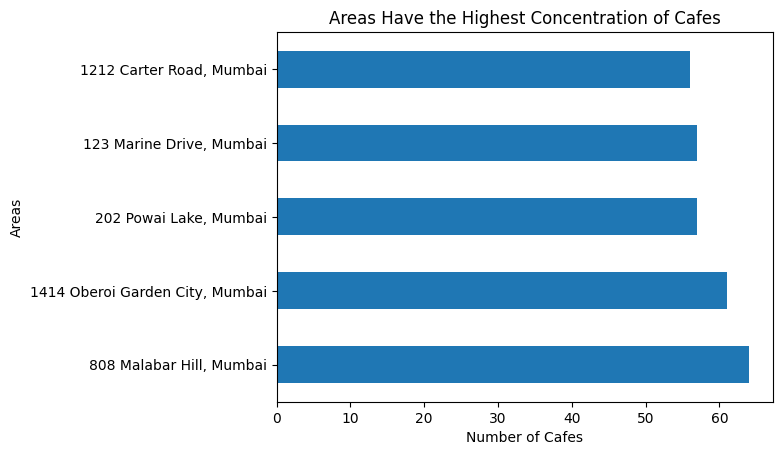

In [117]:
cafe.groupby('Address').count()['Cafe Name'].sort_values(ascending = False).head().plot(kind = 'barh')
plt.title('Areas Have the Highest Concentration of Cafes')
plt.xlabel('Number of Cafes')
plt.ylabel('Areas')

### From this graph we can conclude that Malabar Hills in Mumbai is the place having high Concentration of Cafes

# Average Rating for Each Cuisine Type

Text(0.5, 1.0, 'Average Rating for Each Cuisine Type')

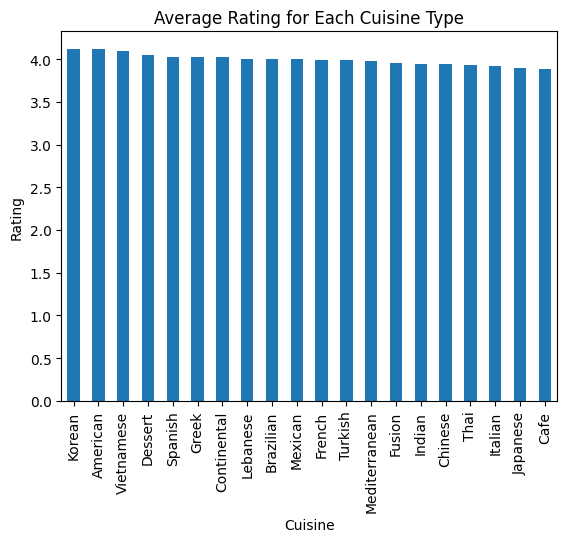

In [118]:
cafe.groupby('Cuisine')['Rating'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('Average Rating for Each Cuisine Type')

The chart shows that all cuisines have similarly high average ratings, with no significant differences between them, indicating consistent customer satisfaction across diverse cuisine types.

# Average Cost for Two Vary by Cuisine Type

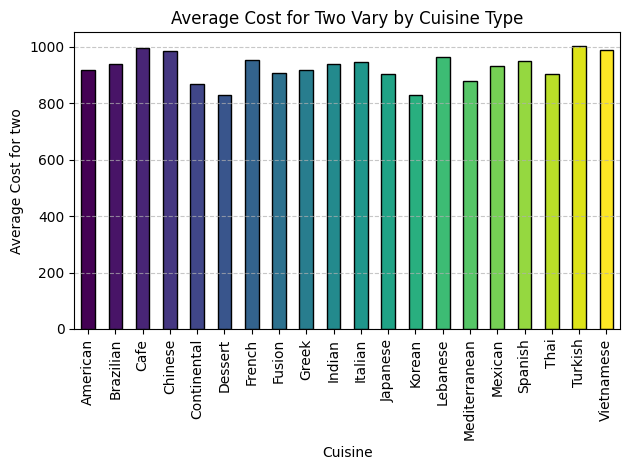

In [119]:
a = cafe.groupby('Cuisine')['Average Cost for Two'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(a)))
a.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Cuisine')
plt.ylabel('Average Cost for two')
plt.title('Average Cost for Two Vary by Cuisine Type')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

# Top Cafes with Highest Ratings

In [121]:
mask = cafe['Rating'] == 5.0
new = cafe[mask]
new[['Cafe Name','Address','Cuisine','Average Cost for Two','Opening Hours','Contact Number']]

,Cafe Name,Address,Cuisine,Average Cost for Two,Opening Hours,Contact Number
65,Bistro Delight 66,"606 Versova, Mumbai",Lebanese,1064,7 AM - 12 PM,7564129167
73,Chillout Cafe 74,"202 Powai Lake, Mumbai",Brazilian,853,10 AM - 8 PM,9053294649
111,Urban Brews 112,"303 Andheri East, Mumbai",Dessert,1042,7 AM - 11 PM,8749301825
142,Morning Dew 143,"1313 Hiranandani Gardens, Mumbai",Indian,572,6 AM - 8 PM,8549473916
150,Urban Brews 151,"303 Andheri East, Mumbai",Italian,1037,10 AM - 9 PM,7395386683
161,Gourmet Coffee 162,"1616 Girgaum, Mumbai",Chinese,1275,10 AM - 12 PM,7871541231
171,Fusion Flavors 172,"1414 Oberoi Garden City, Mumbai",Mexican,343,9 AM - 8 PM,8808002675
367,Sip & Savor 368,"123 Marine Drive, Mumbai",American,1221,7 AM - 12 PM,9882754902
395,Gourmet Coffee 396,"1111 Link Road, Mumbai",Lebanese,893,9 AM - 9 PM,8292936673
438,Gourmet Coffee 439,"808 Malabar Hill, Mumbai",Thai,1169,10 AM - 12 PM,9785981549


## These are the cafes with Highest rating of 5 in Mumbai

# Distribution of Opening Hours Among Cafes

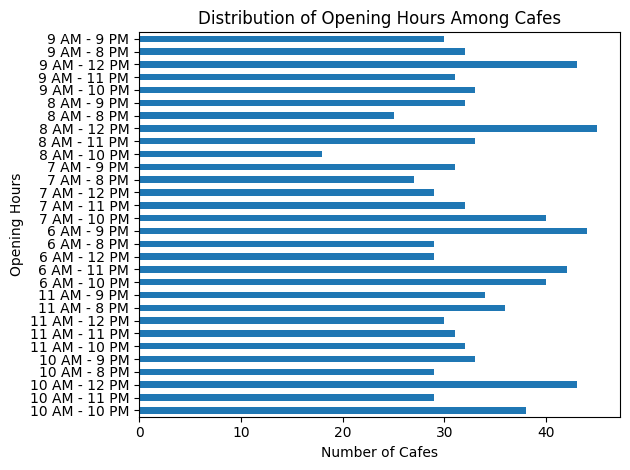

In [122]:
cafe.groupby('Opening Hours')['Cafe Name'].count().plot(kind = 'barh')
plt.xlabel('Number of Cafes')
plt.ylabel('Opening Hours')
plt.title('Distribution of Opening Hours Among Cafes')
plt.tight_layout()
plt.show()

## The graph shows that cafes predominantly operate between 9 AM - 9 PM, with considerable variation in opening and closing hours, reflecting a wide range of operational schedules.

# Areas Have the Most Affordable Cafes

In [136]:
cafe.groupby('Address')['Average Cost for Two'].min().sort_values(ascending = True).head(10).reset_index()

,Address,Average Cost for Two
0,"909 Carter Road, Mumbai",301
1,"1010 Pali Hill, Mumbai",303
2,"789 Bandra West, Mumbai",304
3,"404 Lower Parel, Mumbai",304
4,"1717 Mahalaxmi, Mumbai",305
5,"808 Malabar Hill, Mumbai",306
6,"1111 Link Road, Mumbai",306
7,"707 Worli, Mumbai",309
8,"1515 Marine Lines, Mumbai",313
9,"1212 Carter Road, Mumbai",314


## These are the areas which Have the Most Affordable Cafes

# Most Common Cuisine Types Among the Cafes

In [143]:
cafe.groupby('Cuisine').count()['Cafe Name'].sort_values(ascending = False).reset_index().rename(columns = {'Cafe Name':'Number Of Cafes'}).head()

,Cuisine,Number Of Cafes
0,Korean,61
1,Japanese,59
2,Mediterranean,57
3,Dessert,55
4,Vietnamese,54


## The Most Common Cuisine Types Among the Cafes is Korean

# How Does Cafe Popularity (Ratings) Vary Across Different Parts of Mumbai?

In [155]:
cafe.groupby('Address')['Rating'].mean().sort_values(ascending = False).reset_index()

,Address,Rating
0,"303 Andheri East, Mumbai",4.144186
1,"1010 Pali Hill, Mumbai",4.077778
2,"123 Marine Drive, Mumbai",4.038596
3,"1616 Girgaum, Mumbai",4.037500
4,"909 Carter Road, Mumbai",4.030556
5,"1313 Hiranandani Gardens, Mumbai",4.028261
6,"808 Malabar Hill, Mumbai",4.023438
7,"505 Dadar, Mumbai",4.019048
8,"789 Bandra West, Mumbai",4.010526
9,"202 Powai Lake, Mumbai",4.007018


# This is How Cafe Popularity (Ratings) Vary Across Different Parts of Mumbai